# Predicting default of a credit card holder

## Data Description
This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

### Content
There are 25 variables:

<br>**Customer ID**: ID of each client
<br>**Credit_Amount**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
<br>**Gender**: sex (1=male, 2=female)
<br>**Academic_Qualification**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
<br>**Marital**: Marital status (1=married, 2=single, 3=others)
<br>**Age_Years**: Age in years
<br>**Repayment_Status_Jan**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
<br>**Repayment_Status_Feb**: Repayment status in August, 2005 (scale same as above)
<br>**Repayment_Status_March**: Repayment status in July, 2005 (scale same as above)
<br>**Repayment_Status_April**: Repayment status in June, 2005 (scale same as above)
<br>**Repayment_Status_May**: Repayment status in May, 2005 (scale same as above)
<br>**Repayment_Status_June**: Repayment status in April, 2005 (scale same as above)
<br>**Jan_Bill_Amount**: Amount of bill statement in September, 2005 (NT dollar)
<br>**Feb_Bill_Amount**: Amount of bill statement in August, 2005 (NT dollar)
<br>**March_Bill_Amount**: Amount of bill statement in July, 2005 (NT dollar)
<br>**April_Bill_Amount**: Amount of bill statement in June, 2005 (NT dollar)
<br>**May_Bill_Amount**: Amount of bill statement in May, 2005 (NT dollar)
<br>**June_Bill_Amount**: Amount of bill statement in April, 2005 (NT dollar)
<br>**Previous_Payment_Jan**: Amount of previous payment in September, 2005 (NT dollar)
<br>**Previous_Payment_Feb**: Amount of previous payment in August, 2005 (NT dollar)
<br>**Previous_Payment_March**: Amount of previous payment in July, 2005 (NT dollar)
<br>**Previous_Payment_April**: Amount of previous payment in June, 2005 (NT dollar)
<br>**Previous_Payment_May**: Amount of previous payment in May, 2005 (NT dollar)
<br>**Previous_Payment_June**: Amount of previous payment in April, 2005 (NT dollar)
<br>**Default_Payment**: Default payment (1=yes, 0=no)

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Load Data

In [2]:
df_credit_card = pd.read_csv('BankCreditCard.csv')

In [3]:
df_credit_card.head()

,Customer ID,Credit_Amount,Gender,Academic_Qualification,Marital,Age_Years,Repayment_Status_Jan,Repayment_Status_Feb,Repayment_Status_March,Repayment_Status_April,...,April_Bill_Amount,May_Bill_Amount,June_Bill_Amount,Previous_Payment_Jan,Previous_Payment_Feb,Previous_Payment_March,Previous_Payment_April,Previous_Payment_May,Previous_Payment_June,Default_Payment
0,1,20000.0,2,2,1,24,2,2,0,0,...,0.0,0.0,0.0,0.0,679.0,0.0,0.0,0.0,0.0,1
1,2,220000.0,2,2,2,26,0,2,0,0,...,3272.0,3455.0,3261.0,0.0,2000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,24332.0,14848.0,15548.0,1619.0,2500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,29324.0,28858.0,28547.0,3000.0,2029.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,0,0,0,0,...,20940.0,18146.0,18131.0,3000.0,36672.0,10000.0,9000.0,689.0,679.0,0


Let's have a look at all the columns present in the dataset

In [4]:
df_credit_card.columns

Index(['Customer ID', 'Credit_Amount', 'Gender', 'Academic_Qualification',
       'Marital', 'Age_Years', 'Repayment_Status_Jan', 'Repayment_Status_Feb',
       'Repayment_Status_March', 'Repayment_Status_April',
       'Repayment_Status_May', 'Repayment_Status_June', 'Jan_Bill_Amount',
       'Feb_Bill_Amount', 'March_Bill_Amount', 'April_Bill_Amount',
       'May_Bill_Amount', 'June_Bill_Amount', 'Previous_Payment_Jan',
       'Previous_Payment_Feb', 'Previous_Payment_March',
       'Previous_Payment_April', 'Previous_Payment_May',
       'Previous_Payment_June', 'Default_Payment'],
      dtype='object')

Let's check data types of each column

In [5]:
df_credit_card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             30000 non-null  int64  
 1   Credit_Amount           30000 non-null  float64
 2   Gender                  30000 non-null  int64  
 3   Academic_Qualification  30000 non-null  int64  
 4   Marital                 30000 non-null  int64  
 5   Age_Years               30000 non-null  int64  
 6   Repayment_Status_Jan    30000 non-null  int64  
 7   Repayment_Status_Feb    30000 non-null  int64  
 8   Repayment_Status_March  30000 non-null  int64  
 9   Repayment_Status_April  30000 non-null  int64  
 10  Repayment_Status_May    30000 non-null  int64  
 11  Repayment_Status_June   30000 non-null  int64  
 12  Jan_Bill_Amount         30000 non-null  float64
 13  Feb_Bill_Amount         30000 non-null  float64
 14  March_Bill_Amount       30000 non-null

Remove "Customer ID" since all the values are unique and does not contribute any information for analysis

In [6]:
#Drop customer id column
df_credit_card.drop('Customer ID', axis=1,inplace=True);

# Exploratory data analysis

Let's have a look at the Default Payment, Gender, Academic Qualification, Marital demographics of the data.

### Default Payment

In [7]:
#counts each category in default payment variable
df_credit_card['Default_Payment'].value_counts()

0    23364
1     6636
Name: Default_Payment, dtype: int64

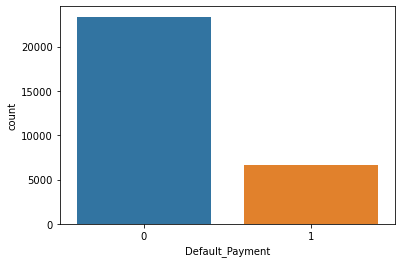

In [8]:
sns.countplot(x='Default_Payment', data=df_credit_card)
plt.show()

23364 observations are 0 where 0 means No and 6636 observations are 1 where 1 means Yes in the target variable

### Gender

In [9]:
df_credit_card['Gender'].value_counts()

2    18112
1    11888
Name: Gender, dtype: int64

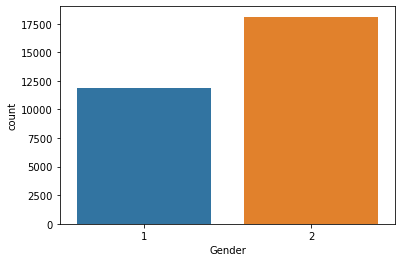

In [10]:
sns.countplot(x='Gender',data=df_credit_card);
plt.show()

The number of female credit card holders are higher than the number of male credit card holders.

There are 11888 male and 18112 female credit card holders.

### Academic Qualification

In [11]:
df_credit_card['Academic_Qualification'].value_counts()

2    14030
1    10585
3     4917
5      280
4      123
6       65
Name: Academic_Qualification, dtype: int64

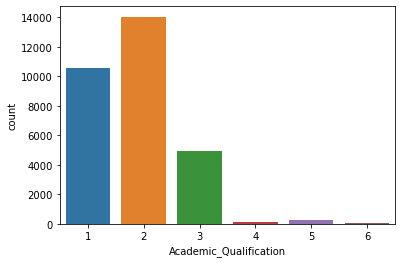

In [12]:
sns.countplot(x='Academic_Qualification',data=df_credit_card)
plt.show()

1=Undergraduate, 2=Graduate, 3=Postgraduate, 4=Professional, 5=Others, 6=Unknown.

The above plot shows most of the credit card holders are students.

### Marital

In [13]:
df_credit_card['Marital'].value_counts()

2    15964
1    13659
3      323
0       54
Name: Marital, dtype: int64

1=Married, 2=Single, 3= Do not prefer to say, 0=no information

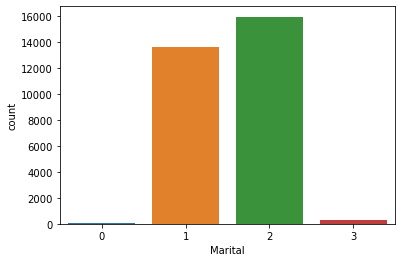

In [14]:
sns.countplot(x='Marital',data=df_credit_card)
plt.show()

From the above plot we can say that most of the credit card holders are 'single', followed by married credit card holders

### Compare "Academic Qualification" with "Default Payment"

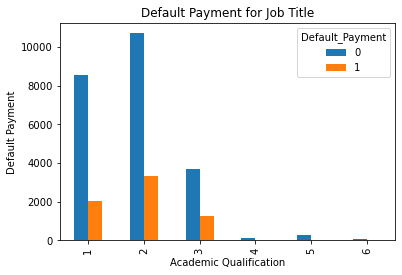

In [15]:
%matplotlib inline
pd.crosstab(df_credit_card.Academic_Qualification,df_credit_card.Default_Payment).plot(kind='bar')
plt.title('Default Payment for Job Title')
plt.xlabel('Academic Qualification')
plt.ylabel('Default Payment');


The above charts shows the default payment status of Undergraduates, graduates and post-graduates. Blue bar shows customers who will not be paying in the next month, whereas orange bar shows payment to be done in the next month.

### Compare "Academic Qualification" and "Marital"

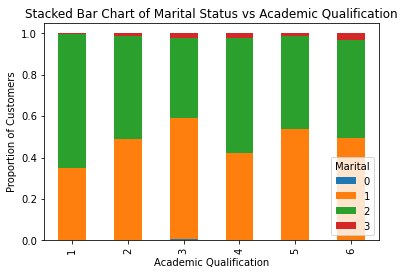

In [16]:
table=pd.crosstab(df_credit_card.Academic_Qualification,df_credit_card.Marital)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Academic Qualification')
plt.xlabel('Academic Qualification')
plt.ylabel('Proportion of Customers')
plt.savefig('mariral_vs_pur_stack')

**Marital**

1=Married, 2=Single, 3= Do not prefer to say, 0=no information

**Academic Qualification**

1=Undergraduate, 2=Graduate, 3=Postgraduate, 4=Professional, 5=Others, 6=Unknown.

The bars represent the proportional marital status of the credit card holders. The x-axis represents customers with an academic qualification




## Correlation Matrix

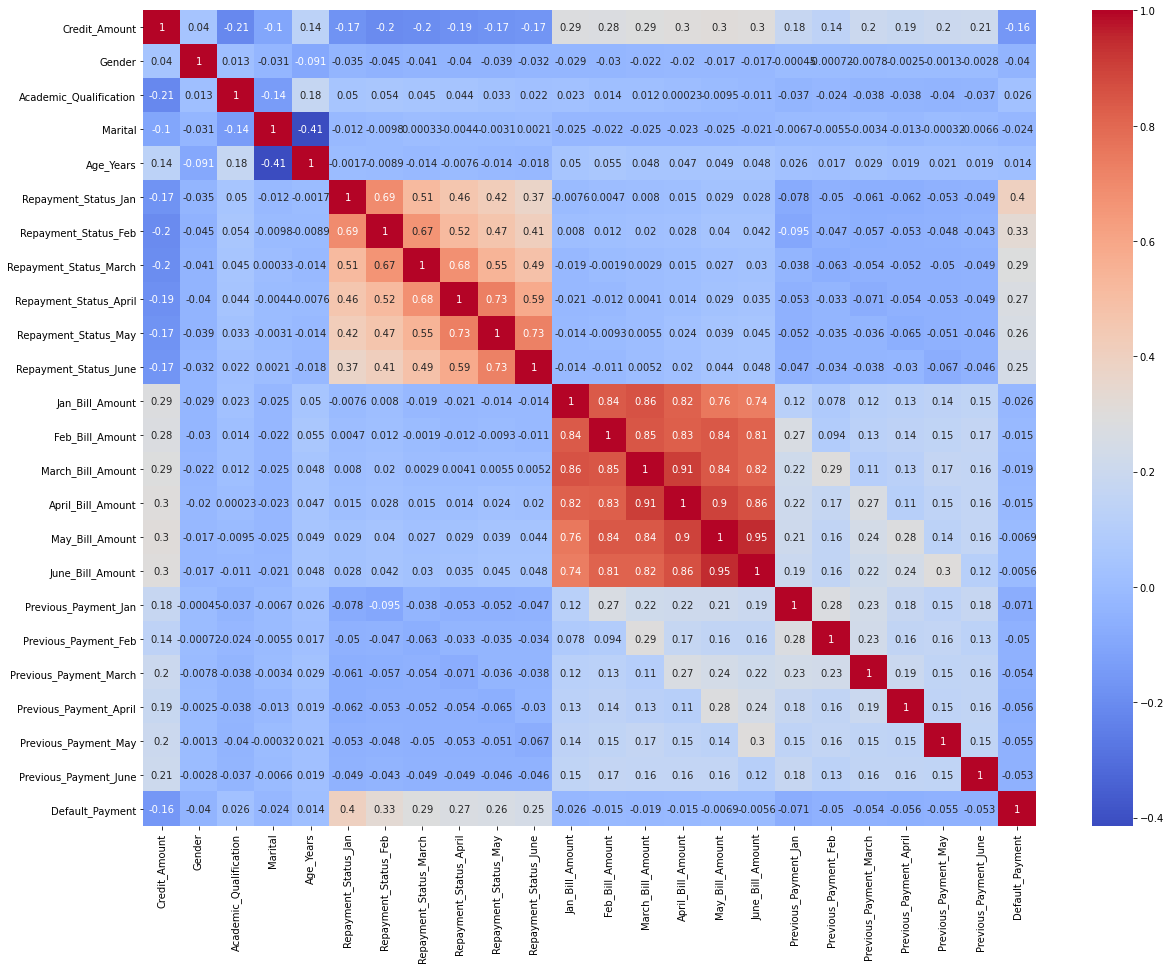

In [18]:
#calculating correlation among numeric variable 
corr_matrix = df_credit_card.corr() 

#plot correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=True);

The above result shows all independent variables are slightly correlated with target variable. But independent variables have multicolinearity. For example: "March_Bill_Amount" is highly correlated with "April_Bill_Amount". 

We have to consider all the variables to build a machine learning algorithm that decides whether a customer will default in the next month or not.

## Splitting the dataset into input and output 

In [20]:
X = df_credit_card.drop('Default_Payment',axis=1)
y = df_credit_card.loc[:,'Default_Payment']

# Implementing logistic regression with SGD

### Splitting input data into training dataset and testing dataset

In [21]:
#import train and test split module from sklearn
from sklearn.model_selection import train_test_split

#split train and test datset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

### Create the logistic regression model with SGD

In [22]:
from sklearn.linear_model import SGDClassifier
logreg_SGD = SGDClassifier(loss="log",max_iter=1000, early_stopping=True)

### Training the model

In [23]:
logreg_SGD.fit(X_train,y_train)

SGDClassifier(early_stopping=True, loss='log')

### Predicting the test set results and caculating the accuracy

In [22]:
pred_test = logreg_SGD.predict(X_test)

In [23]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_SGD.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [24]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_SGD.score(X_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.78


### Cross validation

In [25]:
from sklearn import model_selection
#import cross validation score model from sklearn
from sklearn.model_selection import cross_val_score

#create model selection object with number of splits
kfold = model_selection.KFold(n_splits=10, random_state=0)

#creat a logistic regression model with SGD
modelCV = SGDClassifier(loss="log", tol=0.01,eta0=1.0,learning_rate="adaptive", max_iter=1000, early_stopping=True)

#call cross_val_score
results = model_selection.cross_val_score(modelCV, X, y, cv=10 , scoring='accuracy')
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))
print(results)

10-fold cross validation average accuracy: 0.631
[0.62112629 0.6377874  0.6197934  0.61146285 0.62366667 0.611
 0.66622207 0.59686562 0.66655552 0.65188396]


### Confusion matrix

In [26]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
#create confusion matrix table
confusion_matrix = confusion_matrix(y_test, pred_test)
print(confusion_matrix)

[[6997   12]
 [1975   16]]


True Negative is 5230 that means 5230 observations are correctly predicted as 0.

False Positive is 1779 that means 1779 observations are wrongly predicted as 1.

False Negative is 1137 that means  1137 observations are wronly predicted as 0.

True Positive is 854 that 857 observations are correctly predicted as 1.


In [27]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.78      1.00      0.88      7009
           1       0.57      0.01      0.02      1991

   micro avg       0.78      0.78      0.78      9000
   macro avg       0.68      0.50      0.45      9000
weighted avg       0.73      0.78      0.69      9000



#### Compute precision, recall, F-measure and support

The precision is the ratio tp / (tp + fp) where tp is the number of true positives and fp the number of false positives. The precision is intuitively the ability of the classifier not to label as positive a sample that is negative.

The recall is the ratio tp / (tp + fn) where tp is the number of true positives and fn the number of false negatives. The recall is intuitively the ability of the classifier to find all the positive samples.

The F-beta score can be interpreted as a weighted harmonic mean of the precision and recall, where an F-beta score reaches its best value at 1 and worst score at 0.

The F-beta score weights recall more than precision by a factor of beta. beta == 1.0 means recall and precision are equally important.

The support is the number of occurrences of each class in y_test.

### Training the model with grid search

In [28]:
from sklearn.linear_model import SGDClassifier
from time import time
from sklearn.model_selection import GridSearchCV

logreg_SGD = SGDClassifier(loss='log')

In [29]:
param_grid = {"n_iter": [1, 5, 10],
              "alpha": [0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
             "tol":[0.0001, 0.001, 0.01, 0.1, 1],
             "eta0":[0.2,0.5,1.0,1.5,2.0,2.5,3.0],
             "learning_rate":["adaptive"]}


## Create a model with grid search

In [41]:
# ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

#create grid search object
grid_search = GridSearchCV(logreg_SGD, param_grid=param_grid)

grid_search.fit(X_train, y_train);

## Print best parameter values 

In [31]:
# View the accuracy score
print('Best score for data1:', grid_search.best_score_) 

Best score for data1: 0.7789047619047619


In [32]:
# View the best parameters for the model found using grid search
print('Best C:',grid_search.best_estimator_.C) 
print('Best alpha:',grid_search.best_estimator_.alpha) 
print('Best n_iter:',grid_search.best_estimator_.n_iter)
print('Best tol:',grid_search.best_estimator_.tol) 
print('Best eta0:',grid_search.best_estimator_.eta0) 
print('Best learning rate:',grid_search.best_estimator_.learning_rate) 

Best C: 1.0
Best alpha: 0.0001
Best n_iter: 1
Best tol: 0.001
Best eta0: 2.0
Best learning rate: adaptive


# Build a model using best parameters
create a logistic regression classifier with sgd

In [33]:
logreg_SGD = SGDClassifier(loss="log", alpha=0.001, n_iter=1, penalty='l1', tol=0.01,eta0=1.0,learning_rate="adaptive",max_iter=1000)

## Training the model

In [42]:
# ignore the deprecation warning
warnings.filterwarnings("ignore", category=DeprecationWarning)

logreg_SGD.fit(X_train,y_train)

SGDClassifier(alpha=0.001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=1.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='adaptive', loss='log', max_iter=1000,
       n_iter=1, n_iter_no_change=5, n_jobs=None, penalty='l1',
       power_t=0.5, random_state=None, shuffle=True, tol=0.01,
       validation_fraction=0.1, verbose=0, warm_start=False)

## Predictions on test data

In [35]:
pred_test = logreg_SGD.predict(X_test)

In [36]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_SGD.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.59


In [37]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg_SGD.score(X_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.58


## Confusion matrix

In [38]:
#import confusion matrix from sklearn
from sklearn.metrics import confusion_matrix
#create confusion matrix table
confusion_matrix = confusion_matrix(y_test, pred_test)
print(confusion_matrix)

[[4285 2724]
 [ 941 1050]]


True Negative is 4285 that means 4285 observations are correctly predicted as 0.

False Positive is 2724 that means 2724 observations are wrongly predicted as 1.

False Negative is 941 that means  941 observations are wronly predicted as 0.

True Positive is 1050 that 1050 observations are correctly predicted as 1.

## Classification report

In [39]:
#import classification report from sklearn
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.82      0.61      0.70      7009
           1       0.28      0.53      0.36      1991

   micro avg       0.59      0.59      0.59      9000
   macro avg       0.55      0.57      0.53      9000
weighted avg       0.70      0.59      0.63      9000



It is observed that the F1-score for 0 values is high. Whereas, the F1-score for 1 values are comparitevely low. For a better a better model the F1-score should be balanced.

## ROC curve from sklearn import metrics

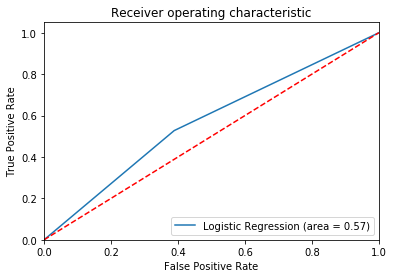

In [40]:
#import metrics from sklearn to calculate auc score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#calculate auc score
logit_roc_auc = roc_auc_score(y_test, logreg_SGD.predict(X_te st))

#Prediction on test data based on the number of thresholds and calculate the false positive rate and true positive rate.
fpr, tpr, thresholds = roc_curve(y_test, logreg_SGD.predict_proba(X_test)[:,1])

# create a figure object
plt.figure()

#plot false positive rate value and true positive rate value and area under curve value
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)

#dignal dotted red line
plt.plot([0, 1], [0, 1],'r--')

#x-axis limitation
plt.xlim([0.0, 1.0])

#y-axis limitaion
plt.ylim([0.0, 1.05])

#x-axis label
plt.xlabel('False Positive Rate')

#y-axis label
plt.ylabel('True Positive Rate')

#title for plot
plt.title('Receiver operating characteristic')

#print legend on lower right
plt.legend(loc="lower right")

#save the plot as a image
plt.savefig('Log_ROC')
#print the plot
plt.show()

AUC ranges from 0 to 1. A model whose predictions are 100% wrong has an AUC of 0.0; one whose predictions are 100% correct has an AUC of 1.0.

### Conclusion

The logistic regression with SGD classifier has an accuracy of 57% when predicting the default of the the credit card holders.